In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### *Let us understand Maths by implementing, In your data science journey you cannot get the complete interpretation of the algorithms without knowing the underlying math.*

Don't change the below code

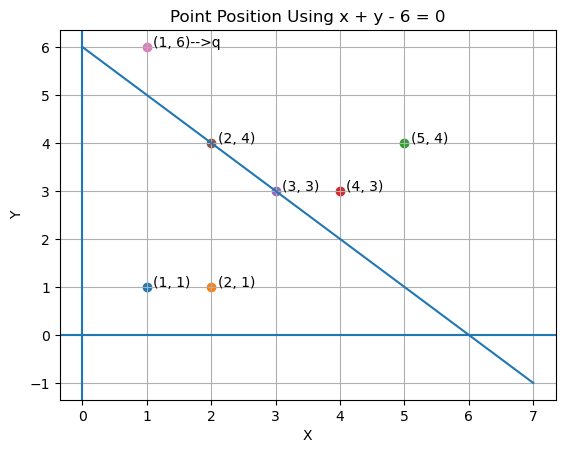

In [2]:
# Line: x + y = 6  →  y = 6 - x
x = np.linspace(0, 7, 100)
y = 6 - x

# Points
left_points = [(1,1), (2,1)]
right_points = [(5,4), (4,3)]
on_line =[(3,3),(2,4)]
q=(1,6)

plt.plot(x, y)

for p in left_points:
    plt.scatter(p[0], p[1])
    plt.text(p[0]+0.1, p[1], f"{p[0],p[1]}")

for p in right_points:
    plt.scatter(p[0], p[1])
    plt.text(p[0]+0.1, p[1], f"{p[0],p[1]}")

for p in on_line:
    plt.scatter(p[0], p[1])
    plt.text(p[0]+0.1, p[1], f"{p[0],p[1]}")

plt.scatter(q[0],q[1])
plt.text(q[0]+0.1, q[1], f"{q[0],q[1]}-->q")

plt.axhline(0)
plt.axvline(0)
plt.grid(True)
plt.title("Point Position Using x + y - 6 = 0")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


1. In the above graph we can see some points to the right of the line, left of the line and also on the line.
2. we can also see a point q.
3. let us try to do some math on these points.



#### Task–1:

1. Calculate the **Euclidean distance** between the query point \(q\) and **all the points on the left side** of the line.

2. Calculate the **Euclidean distance** between the query point \(q\) and **all the points on the right side** of the line.

3. Similarly, calculate the **Euclidean distance** between the query point \(q\) and **a point lying on the line**.

4. Based on your calculations, answer the following:
   - Which point is **nearest to the query point \(q\)?**

---


In [3]:
# code here

In [4]:
from scipy.spatial.distance import euclidean

# Query point
q = (1, 6)

left_points = {
    "P1(1,1)": (1, 1),
    "P2(2,1)": (2, 1)
}

right_points = {
    "P3(5,4)": (5, 4),
    "P4(4,3)": (4, 3)
}

on_line_points = {
    "P5(3,3)": (3, 3),
    "P6(2,4)": (2, 4)
}

In [5]:
# Distance calculations
print("Distances to LEFT-side points:")
for name, p in left_points.items():
    print(f"{name}: {euclidean(q, p):.4f}")

print("\nDistances to RIGHT-side points:")
for name, p in right_points.items():
    print(f"{name}: {euclidean(q, p):.4f}")

print("\nDistances to ON-LINE points:")
for name, p in on_line_points.items():
    print(f"{name}: {euclidean(q, p):.4f}")

Distances to LEFT-side points:
P1(1,1): 5.0000
P2(2,1): 5.0990

Distances to RIGHT-side points:
P3(5,4): 4.4721
P4(4,3): 4.2426

Distances to ON-LINE points:
P5(3,3): 3.6056
P6(2,4): 2.2361


**Nearest point to the query point q = (1,6):**
> P6 = (2,4)
- Distance = 2.236

#### Task -2


In [6]:
line_exp = lambda x, y: 1*x + 1*y - 6 # the equation is x+y-6=0
line_exp(0,0) # substitute the x and y values

-6

1. What do you notice about the sign of the values for:

*   Left-side points?
*   Right-side points?
*   The point on the line?

2. Where does the query point q lie based on its output?

3. What general rule can you infer about the expression 1*x + 1*y - 6?

4. If i give another point w that is not present can you identify on which side of the plane will the point reside?



In [7]:
# code here

In [14]:
def classify_point(w):
    """
    Classifies a point w = (x, y) based on the sign of x + y - 6
    """
    value = line_exp(w[0], w[1])

    if value < 0:
        return value, "Left side of the line"
    elif value > 0:
        return value, "Right side of the line"
    else:
        return value, "On the line"

In [15]:
# Existing points
left_points = [(1, 1), (2, 1)]
right_points = [(5, 4), (4, 3)]
on_line_points = [(3, 3), (2, 4)]
q = (1, 6)

In [16]:
print("Left-side points:")
for p in left_points:
    print(p, classify_point(p))

print("\nRight-side points:")
for p in right_points:
    print(p, classify_point(p))

print("\nOn-line points:")
for p in on_line_points:
    print(p, classify_point(p))

print("\nQuery point q:")
print(q, classify_point(q))

Left-side points:
(1, 1) (-4, 'Left side of the line')
(2, 1) (-3, 'Left side of the line')

Right-side points:
(5, 4) (3, 'Right side of the line')
(4, 3) (1, 'Right side of the line')

On-line points:
(3, 3) (0, 'On the line')
(2, 4) (0, 'On the line')

Query point q:
(1, 6) (1, 'Right side of the line')


In [17]:
w = (0, 0)
print("\nNew point w:")
print(w, classify_point(w))


New point w:
(0, 0) (-6, 'Left side of the line')


### Task3: Classify Points Using the Dot Product with Normal

We have the line:

\[
x + y - 6 = 0
\]

1. The vector perpendicular to the line is called the **normal**, and it is:
\[
n = (1, 1)
\]

2. You are given the following points:

- Left-side candidates: P1 = (1,1), P2 = (2,1)  
- Right-side candidates: P3 = (5,4), P4 = (4,3)  
- On the line: P5 = (3,3), P6 = (2,4)  
- Query point: q = (2,4)

---

#### Instructions:

1. For each point \(p = (x, y)\), compute the expression:
\(
n \.p - 6
\)

2. Based on the **sign of `value`**, classify the point as:

- **Right of the line** (value > 0)  
- **Left of the line** (value < 0)  
- **On the line** (value = 0)

3. Document your results in a dataframe showing:

| Point | Value | Classification |
|-------|-------|----------------|

4. Do the same for the query point `q`.


In [8]:
n= np.array([1,1]) # this is the normal vector of the equation x+y-6=0
p=np.array([2,4])
np.dot(n,p)-6 #----> here the point is (2,4) when computed dot product with (1,1) i.e. normal and subtract 6, the result is 0.
# this point lies on the line.

0

In [9]:
# code here

In [19]:
points = {
    "P1": (1, 1),
    "P2": (2, 1),
    "P3": (5, 4),
    "P4": (4, 3),
    "P5": (3, 3),
    "P6": (2, 4),
    "q":  (2, 4)
}
# Function to classify a point
def classify_point(point, n):
    """
    Computes n.p - 6 and classifies the point
    """
    value = np.dot(n, point) - 6

    if value > 0:
        classification = "Right of the line"
    elif value < 0:
        classification = "Left of the line"
    else:
        classification = "On the line"

    return value, classification

In [22]:
import pandas as pd

In [23]:
results = []

for name, p in points.items():
    value, cls = classify_point(np.array(p), n)
    results.append([name, value, cls])
df = pd.DataFrame(results, columns=["Point", "Value (n·p - 6)", "Classification"])

df

,Point,Value (n·p - 6),Classification
0,P1,-4,Left of the line
1,P2,-3,Left of the line
2,P3,3,Right of the line
3,P4,1,Right of the line
4,P5,0,On the line
5,P6,0,On the line
6,q,0,On the line


### Task 4: Classify Points and Compute Distances for Planes.

#### 1: Calculate the euclidean distance between these 2 points {p1=(10,1,2), p2=(11,10,2)}

#### 2: 3D Plane
- Plane: x + y + z - 6 = 0
- Points: A(1,1,1), B(2,2,2), C(3,2,2), q(2,1,3)
- Compute:
  1. Dot product: n · p - d
  2. Side of the plane (Above/Below/On)
- Document results in a table:

| Point | Value | Classification |
|-------|-------|----------------|

In [29]:
p1 = np.array([[10, 1, 2]])   # shape (1, 3)
p2 = np.array([[11, 10, 2]])  # shape (1, 3)

dist = euclidean_distances(p1, p2)
dist

array([[9.05538514]])

In [30]:
# Normal vector and d
n = np.array([1, 1, 1])
d = 6

points = {
    "A": (1, 1, 1),
    "B": (2, 2, 2),
    "C": (3, 2, 2),
    "q": (2, 1, 3)
}

# Function to compute value and classification
def classify_point_3d(point, n, d):
    value = np.dot(n, point) - d

    if value > 0:
        classification = "Above the plane"
    elif value < 0:
        classification = "Below the plane"
    else:
        classification = "On the plane"

    return value, classification


In [32]:
results = []

for name, p in points.items():
    value, cls = classify_point_3d(np.array(p), n, d)
    results.append([name, value, cls])

df = pd.DataFrame(results, columns=["Point", "Value (n·p - d)", "Classification"])

df

,Point,Value (n·p - d),Classification
0,A,-3,Below the plane
1,B,0,On the plane
2,C,1,Above the plane
3,q,0,On the plane


### Task 5: Classify Points and Compute Distances for Hyperplanes

#### 1: Calculate the euclidean distance between these 2 points {p1=(10,1,2,3), p2=(11,10,2,5)}

#### 2: 4D Hyperplane
- Hyperplane: 2x1 + x2 - x3 + x4 - 5 = 0
- Points: P1(1,1,0,2), P2(2,0,1,1), P3(1,2,1,1), q(1,1,1,1)
- Compute:
  1. Dot product: n · p + b , where n is the normal vector and p is the data point b is the intercept.
  2. Euclidean distance from hyperplane
  3. Side (Positive/Negative/On)
- Document results in a table:

| Point | Value | Classification |
|-------|-------|----------------|


In [35]:
p1 = np.array([[10, 1, 2, 3]])   # shape (1, 4)
p2 = np.array([[11, 10, 2, 5]])  # shape (1, 4)

dist = euclidean_distances(p1, p2)
dist

array([[9.2736185]])

In [36]:
# Normal vector and intercept
n = np.array([2, 1, -1, 1])
b = -5
points = {
    "P1": (1, 1, 0, 2),
    "P2": (2, 0, 1, 1),
    "P3": (1, 2, 1, 1),
    "q":  (1, 1, 1, 1)
}

# Function to compute value, distance, and classification
def classify_point_4d(point, n, b):
    value = np.dot(n, point) + b
    distance = abs(value) / np.linalg.norm(n)

    if value > 0:
        classification = "Positive side"
    elif value < 0:
        classification = "Negative side"
    else:
        classification = "On the hyperplane"

    return value, distance, classification

In [37]:
# Collect results
results = []

for name, p in points.items():
    value, dist, cls = classify_point_4d(np.array(p), n, b)
    results.append([name, value, dist, cls])

# Create DataFrame
df = pd.DataFrame(
    results,
    columns=["Point", "Value (n·p + b)", "Distance from Hyperplane", "Classification"]
)

df

,Point,Value (n·p + b),Distance from Hyperplane,Classification
0,P1,0,0.000000,On the hyperplane
1,P2,-1,0.377964,Negative side
2,P3,-1,0.377964,Negative side
3,q,-2,0.755929,Negative side
